# Meta-analytic functional decoding
## Discrete functional decoding


In [1]:
import pandas as pd

In [17]:
# 读取 CSV 文件
patient_minus_control = "/Users/ss/Documents/Self_Psych_Meta/Output/6_Decoding/patient_minus_control.csv"
df = pd.read_csv(patient_minus_control)

In [18]:
# 删除每行开头的 "terms_abstract_tfidf__"
df["feature"] = df["feature"].str.replace("terms_abstract_tfidf__", "", regex=False)

In [19]:
output_path = "/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/patient_minus_control_clean.csv"
df.to_csv(output_path, index=False)

### 解码部分

### Plot word cloud

In [22]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:

# 定义输入文件列表
csv_files = [
    '/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/control_clean.csv',
    '/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/control_minus_patient_clean.csv',
    '/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/patient_clean.csv',
    '/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/patient_minus_control_clean.csv',
    '/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/sz_clean.csv'
]

# 定义输出目录
output_dir = '/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud'
os.makedirs(output_dir, exist_ok=True)  # 如果目录不存在，则创建

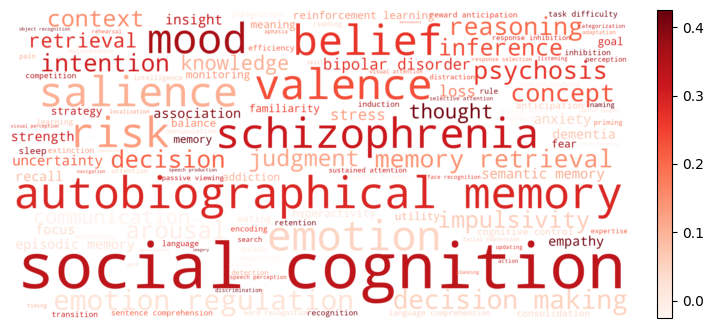

词云图已保存到 /Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/control_clean.csv_wordcloud.png


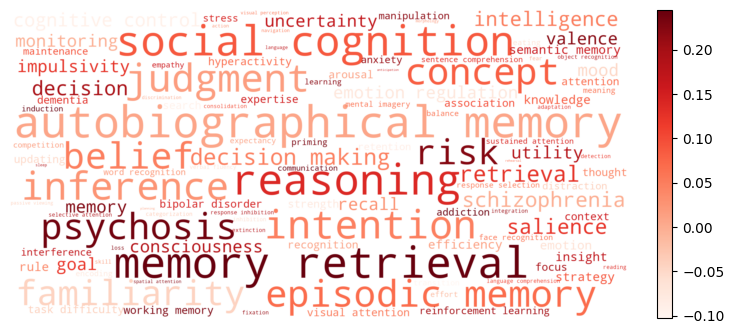

词云图已保存到 /Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/control_minus_patient_clean.csv_wordcloud.png


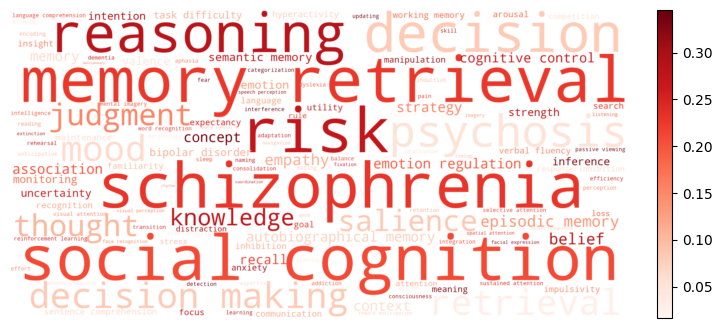

词云图已保存到 /Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/patient_clean.csv_wordcloud.png


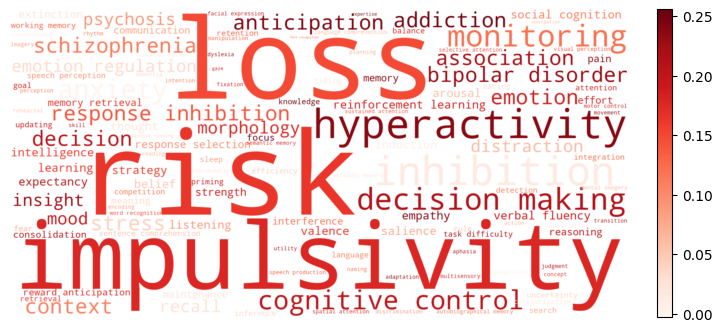

词云图已保存到 /Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/patient_minus_control_clean.csv_wordcloud.png


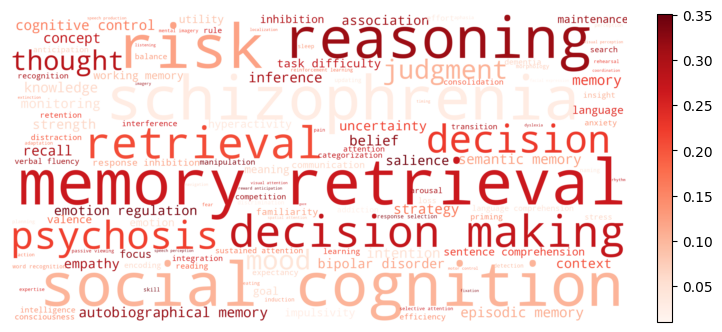

词云图已保存到 /Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/sz_clean.csv_wordcloud.png


In [21]:
# 批量处理每个 CSV 文件
for file_path in csv_files:
    # 读取 CSV 数据
    data = pd.read_csv(file_path)

    # 构建词频字典，使用 'feature' 作为单词，'r' 作为词频
    word_frequencies = data.set_index('feature')['r'].to_dict()

    # 创建词云
    wordcloud = WordCloud(
        width=800,
        height=400,
        colormap="Reds",
        background_color='white',
        max_words=150,
        max_font_size=150,
        scale=3,
        relative_scaling=0.5,
        prefer_horizontal=1.0
    ).generate_from_frequencies(word_frequencies)

    # 绘制并显示词云图
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 关闭坐标轴

    # 获取'r'值的范围，用于color bar
    r_values = list(word_frequencies.values())
    vmin, vmax = min(r_values), max(r_values)

    # 创建一个标量映射对象，用于color bar
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
    sm.set_array([])  

    # 添加color bar
    cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('', rotation=270, labelpad=15)  # 设置color bar的标签

    # 显示图像
    plt.show()

    # 保存词云图为文件
    file_name = os.path.basename(file_path).replace('extract_', '').replace('_decode.csv', '')  # 提取文件名的一部分
    output_path = os.path.join(output_dir, f'{file_name}_wordcloud.png')
    wordcloud.to_file(output_path)

    print(f"词云图已保存到 {output_path}")
